In [1]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.6/2.6 MB 7.2 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
     ---------------------------------------- 15.8/15.8 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=017242e6bb2d12531514094693de0150ac8678a3f6803f95181a2ecce6f7f910
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
import nltk

In [13]:
df=pd.read_csv(r"G:\datasets\abcnews-date-text.csv")

In [14]:
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [16]:
df=df.sample(500)

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [19]:
from wordcloud import WordCloud

In [23]:
s=stopwords.words('english')

In [25]:
def preprocess(text):
    text=text.lower()
    w=word_tokenize(text)
    l=WordNetLemmatizer()
    words=[l.lemmatize(x) for x in w if x not in s]
    return words

In [27]:
df['pre_text']=df['headline_text'].apply(preprocess)

In [28]:
df

,publish_date,headline_text,pre_text
1175519,20190906,rare weather event over antarctica drives hot ...,"[rare, weather, event, antarctica, drive, hot,..."
566395,20100930,clem7 company fears bankruptcy,"[clem7, company, fear, bankruptcy]"
1033788,20160624,renewable energy technology breakthroughs need...,"[renewable, energy, technology, breakthrough, ..."
1066041,20170116,sydney fish market realtor car firebombed,"[sydney, fish, market, realtor, car, firebombed]"
1179919,20191023,shackling not to blame for prisoners death inq...,"[shackling, blame, prisoner, death, inquest, f..."
...,...,...,...
1031673,20160613,thai king recovering well after operation pala...,"[thai, king, recovering, well, operation, pala..."
1135657,20180726,plan for dover woodchip mill ditched,"[plan, dover, woodchip, mill, ditched]"
37693,20030819,man charged over gun incident,"[man, charged, gun, incident]"
156138,20050408,alleged barter bar sets up open ended probe,"[alleged, barter, bar, set, open, ended, probe]"


In [36]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

di=Dictionary(df['pre_text'])

In [37]:
di

In [38]:
di.filter_extremes(no_below=5,no_above=0.5)

In [39]:
di

In [40]:
bow=[di.doc2bow(x) for x in df['pre_text']]

In [41]:
bow

[[],
 [(0, 1)],
 [(1, 1)],
 [(2, 1), (3, 1)],
 [(4, 1)],
 [],
 [],
 [(5, 1)],
 [],
 [(6, 1)],
 [],
 [(7, 1)],
 [(8, 1), (9, 1)],
 [],
 [],
 [],
 [(10, 1)],
 [],
 [],
 [(11, 1)],
 [],
 [(7, 1)],
 [(0, 1), (9, 1), (12, 1)],
 [],
 [(3, 1)],
 [(13, 1)],
 [],
 [(14, 1)],
 [(15, 1)],
 [(8, 1)],
 [(3, 1), (16, 1), (17, 1)],
 [(18, 1)],
 [(19, 1)],
 [],
 [],
 [(2, 1), (20, 1)],
 [(12, 1), (21, 1)],
 [(5, 1)],
 [],
 [],
 [],
 [],
 [(4, 1), (14, 1), (22, 1)],
 [],
 [(23, 1)],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [],
 [(9, 1), (24, 1)],
 [],
 [],
 [(24, 1)],
 [],
 [],
 [(3, 1), (24, 1)],
 [(13, 1)],
 [(23, 1)],
 [(13, 1)],
 [(5, 1)],
 [],
 [],
 [],
 [(25, 1)],
 [],
 [],
 [],
 [(21, 1)],
 [],
 [],
 [(24, 1)],
 [(26, 1), (27, 1)],
 [(21, 1)],
 [],
 [(17, 1)],
 [(26, 1)],
 [(28, 1), (29, 1)],
 [(30, 1)],
 [(28, 1)],
 [(21, 1)],
 [(5, 1), (26, 1)],
 [(9, 1), (12, 1), (31, 1)],
 [],
 [],
 [(32, 1)],
 [],
 [(17, 1)],
 [],
 [],
 [(27, 1)],
 [],
 [(15, 1)],
 [(33, 1)],
 [],
 [(25, 1)],
 [(5, 1), (18, 1)],
 [(

In [42]:
num_topics=10

In [43]:
lda=LdaModel(corpus=bow,num_topics=num_topics,id2word=di,passes=20,alpha='auto',eta='auto')

In [46]:
lda.show_topics(log=False,formatted=False)

[(0,
  [('sydney', 0.31893313),
   ('year', 0.16057205),
   ('lead', 0.13795437),
   ('car', 0.13780658),
   ('trump', 0.11536858),
   ('alleged', 0.02488499),
   ('fire', 0.0023603938),
   ('new', 0.0023255155),
   ('south', 0.0022850935),
   ('election', 0.0022846991)]),
 (1,
  [('coronavirus', 0.30821943),
   ('govt', 0.17360575),
   ('interview', 0.17357212),
   ('nsw', 0.17354514),
   ('say', 0.010202304),
   ('court', 0.0036861438),
   ('new', 0.003583307),
   ('car', 0.0035023973),
   ('australia', 0.0034852936),
   ('wa', 0.0034385812)]),
 (2,
  [('police', 0.29065403),
   ('news', 0.16079965),
   ('wa', 0.16058117),
   ('coast', 0.10808789),
   ('alleged', 0.08171962),
   ('cut', 0.029005412),
   ('health', 0.02900204),
   ('man', 0.023795484),
   ('nt', 0.0027389412),
   ('council', 0.002733204)]),
 (3,
  [('call', 0.27340004),
   ('home', 0.18316084),
   ('industry', 0.18313302),
   ("'s", 0.09271714),
   ('fear', 0.070102096),
   ('get', 0.07009993),
   ('alleged', 0.024878

In [47]:
wc=WordCloud(height=200,width=200,background_color='black',min_font_size=10)

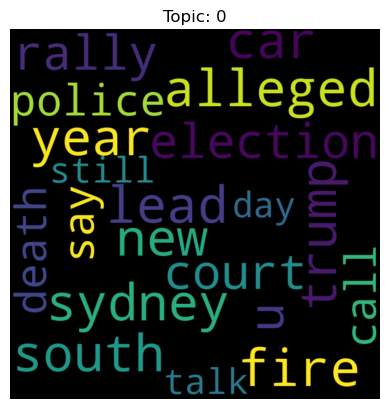

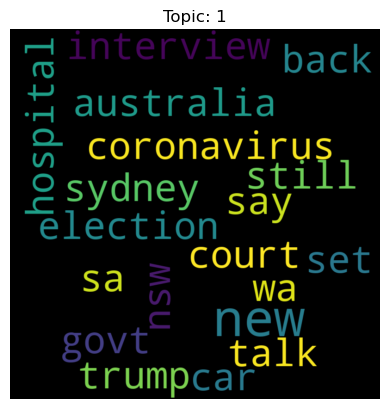

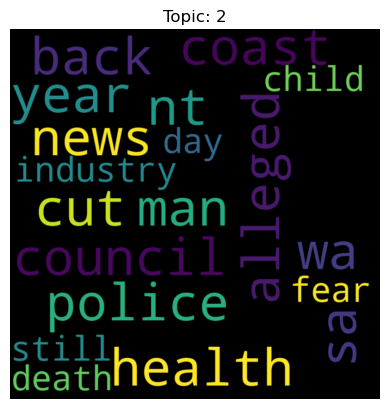

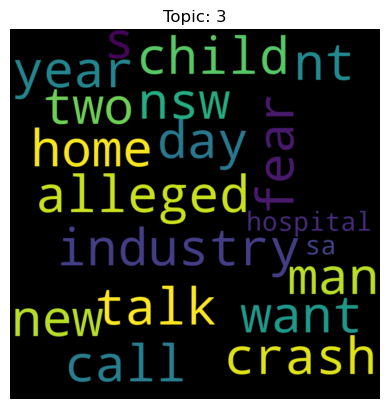

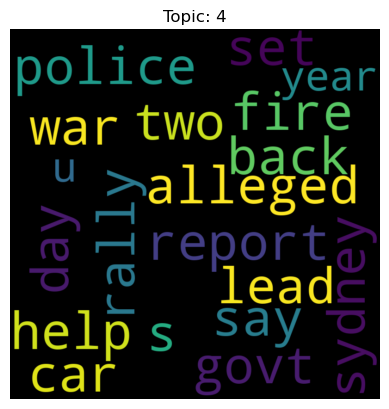

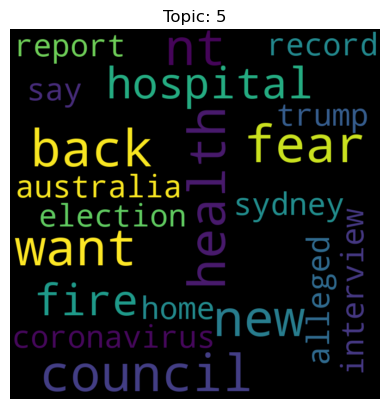

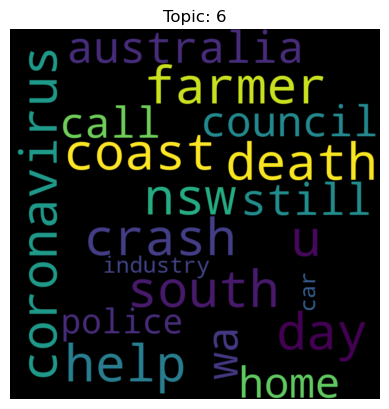

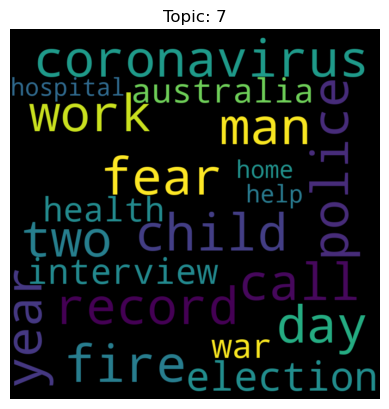

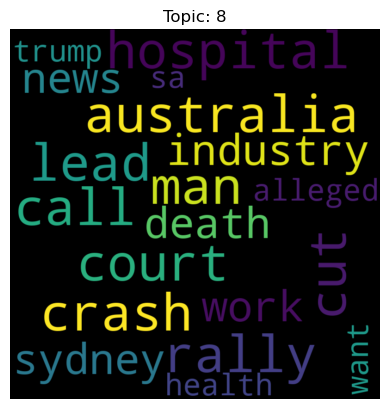

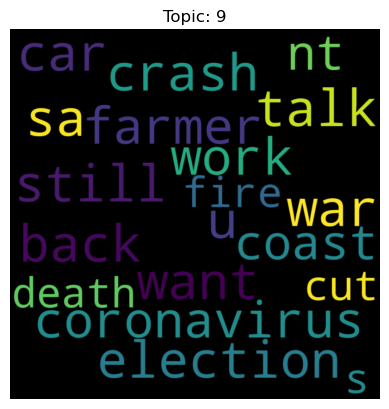

In [49]:
for topic_id,topic in enumerate(lda.show_topics(num_topics=num_topics,num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()